In [378]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [405]:
class Particle:
   
    def __init__(self, dims, p_range, v_range):
        
        #dims = number of dimensions
        #p= position of the particle in the dimentional space
        #v = velocity of the particle in the dimensional space
        #p_range = range of dimensions 
        #v_range = range of velocities
        
        #let the position and velocity of a praticle be randomly selected from uniform distribution
        self.p = np.random.uniform(p_range[0], p_range[1], (dims, ))
        self.v = np.random.uniform(v_range[0], v_range[1], (dims, )) 
        
        #the best position for any particle can be positive infinity
        self.pbest = np.inf
        
        #define particles best position based on specified dimensions
        self.pbestpos = np.zeros((dims, ))

In [475]:
class Swarm:
    
    def __init__(self, particle_no, dims, p_range, v_range, alpha_range, component):
        
        #particle_no = number of particles
        #dims = dimensions
        #p_range = range of dimensions 
        #v_range = range of velocities
        #alpha_range = inertia weight range
        #components = cognetive and social components
        
        
        #define the swarm with praticles from Class Particle
        self.p = np.array([Particle(dims, p_range, v_range) for i in range(particle_no)])
        
        #define global best as infinity
        self.gbest = np.inf
        
        #define global best poition
        self.gbestpos = np.zeros((dims, ))
        
        self.p_range = p_range
        self.v_range = v_range
        
        self.alpha_range = alpha_range
        
        #components
        self.component0 = component[0]
        self.component1 = component[1]
        self.dims = dims
        
        self.mserror = []
        self.no_of_iterations = []
        self.graphic_iters = []
        self.actual_iters = range(100)
    
    
    def drawGraph(self):
        plt.plot(range(100), self.mserror, color='black')
       
    def optimize(self, function, input_X, output_Y,  print_step,  iter):
  
        for i in range(iter):

            self.no_of_iterations.append(iter)
            for particle in self.p:
                
                fitness = function(input_X, output_Y, particle.p)
                self.mserror.append(np.mean(fitness))
                #select the particles best position
                if fitness.any() < particle.pbest:
                    particle.pbest = fitness.any()
                    particle.pbestpos = particle.p.copy()
                    
                #select the global best position    
                if fitness.any() < self.gbest:
                    self.gbest = fitness.any()
                    self.gbestpos = particle.p.copy()
                    

            for particle in self.p:
               
                alpha = np.random.uniform(self.alpha_range[0], self.alpha_range[1], 1)[0]
                
                #velocity update formula
                particle.v = alpha * particle.v + (self.component0 * np.random.uniform(0.0, 1.0, (self.dims, )) * \
                (particle.pbestpos - particle.p)) + (self.component1 * np.random.uniform(0.0, 1.0, (self.dims, )) \
                * (self.gbestpos - particle.p))
                epsilon = 1
                #particle.v = particle.v.clip(min=self.v_range[0], max=self.v_range[1])
                particle.p = particle.p + epsilon * particle.v
                #particle.x = particle.x.clip(min=self.x_range[0], max=self.x_range[1])
                    
                    
                    
            
                print('iteration#: ', i+1,  ' loss: ', fitness)
                

        print("global best loss: ", self.gbest)
        
    def get_best_solution(self):
    
        return self.gbestpos   


In [476]:
import csv
with open("X_linear.csv", 'r') as f:
    Xin = list(csv.reader(f, delimiter=";"))
import numpy as np
Xin = np.array(Xin[1:], dtype=np.float)
print(Xin)
print(Xin.shape)

[[-1.  ]
 [-0.98]
 [-0.96]
 [-0.94]
 [-0.92]
 [-0.9 ]
 [-0.88]
 [-0.86]
 [-0.84]
 [-0.82]
 [-0.8 ]
 [-0.78]
 [-0.76]
 [-0.74]
 [-0.72]
 [-0.7 ]
 [-0.68]
 [-0.66]
 [-0.64]
 [-0.62]
 [-0.6 ]
 [-0.58]
 [-0.56]
 [-0.54]
 [-0.52]
 [-0.5 ]
 [-0.48]
 [-0.46]
 [-0.44]
 [-0.42]
 [-0.4 ]
 [-0.38]
 [-0.36]
 [-0.34]
 [-0.32]
 [-0.3 ]
 [-0.28]
 [-0.26]
 [-0.24]
 [-0.22]
 [-0.2 ]
 [-0.18]
 [-0.16]
 [-0.14]
 [-0.12]
 [-0.1 ]
 [-0.08]
 [-0.06]
 [-0.04]
 [-0.02]
 [ 0.  ]
 [ 0.02]
 [ 0.04]
 [ 0.06]
 [ 0.08]
 [ 0.1 ]
 [ 0.12]
 [ 0.14]
 [ 0.16]
 [ 0.18]
 [ 0.2 ]
 [ 0.22]
 [ 0.24]
 [ 0.26]
 [ 0.28]
 [ 0.3 ]
 [ 0.32]
 [ 0.34]
 [ 0.36]
 [ 0.38]
 [ 0.4 ]
 [ 0.42]
 [ 0.44]
 [ 0.46]
 [ 0.48]
 [ 0.5 ]
 [ 0.52]
 [ 0.54]
 [ 0.56]
 [ 0.58]
 [ 0.6 ]
 [ 0.62]
 [ 0.64]
 [ 0.66]
 [ 0.68]
 [ 0.7 ]
 [ 0.72]
 [ 0.74]
 [ 0.76]
 [ 0.78]
 [ 0.8 ]
 [ 0.82]
 [ 0.84]
 [ 0.86]
 [ 0.88]
 [ 0.9 ]
 [ 0.92]
 [ 0.94]
 [ 0.96]
 [ 0.98]]
(100, 1)


In [477]:
#input_X = layer1_input.values
input_X= Xin
input_X

array([[-1.  ],
       [-0.98],
       [-0.96],
       [-0.94],
       [-0.92],
       [-0.9 ],
       [-0.88],
       [-0.86],
       [-0.84],
       [-0.82],
       [-0.8 ],
       [-0.78],
       [-0.76],
       [-0.74],
       [-0.72],
       [-0.7 ],
       [-0.68],
       [-0.66],
       [-0.64],
       [-0.62],
       [-0.6 ],
       [-0.58],
       [-0.56],
       [-0.54],
       [-0.52],
       [-0.5 ],
       [-0.48],
       [-0.46],
       [-0.44],
       [-0.42],
       [-0.4 ],
       [-0.38],
       [-0.36],
       [-0.34],
       [-0.32],
       [-0.3 ],
       [-0.28],
       [-0.26],
       [-0.24],
       [-0.22],
       [-0.2 ],
       [-0.18],
       [-0.16],
       [-0.14],
       [-0.12],
       [-0.1 ],
       [-0.08],
       [-0.06],
       [-0.04],
       [-0.02],
       [ 0.  ],
       [ 0.02],
       [ 0.04],
       [ 0.06],
       [ 0.08],
       [ 0.1 ],
       [ 0.12],
       [ 0.14],
       [ 0.16],
       [ 0.18],
       [ 0.2 ],
       [ 0.22],
       [

In [478]:
print(input_X.shape)

(100, 1)


In [479]:
output_Y = np.zeros(shape=(100,1))

In [480]:
#perfect_predict_Y = np.full((100, 1), 1, dtype=int)

In [481]:
#print(perfect_predict_Y.shape)
#perfect_predict_Y 

In [482]:
def cubic(input_X):
    output_Y = input_X **3
    return output_Y

In [483]:
output_Y = cubic(input_X)

In [484]:
output_Y

array([[-1.00000e+00],
       [-9.41192e-01],
       [-8.84736e-01],
       [-8.30584e-01],
       [-7.78688e-01],
       [-7.29000e-01],
       [-6.81472e-01],
       [-6.36056e-01],
       [-5.92704e-01],
       [-5.51368e-01],
       [-5.12000e-01],
       [-4.74552e-01],
       [-4.38976e-01],
       [-4.05224e-01],
       [-3.73248e-01],
       [-3.43000e-01],
       [-3.14432e-01],
       [-2.87496e-01],
       [-2.62144e-01],
       [-2.38328e-01],
       [-2.16000e-01],
       [-1.95112e-01],
       [-1.75616e-01],
       [-1.57464e-01],
       [-1.40608e-01],
       [-1.25000e-01],
       [-1.10592e-01],
       [-9.73360e-02],
       [-8.51840e-02],
       [-7.40880e-02],
       [-6.40000e-02],
       [-5.48720e-02],
       [-4.66560e-02],
       [-3.93040e-02],
       [-3.27680e-02],
       [-2.70000e-02],
       [-2.19520e-02],
       [-1.75760e-02],
       [-1.38240e-02],
       [-1.06480e-02],
       [-8.00000e-03],
       [-5.83200e-03],
       [-4.09600e-03],
       [-2.

In [485]:
#define no of nodes in each layer..
INPUT_NODES = 1
HIDDEN_NODES = 20
OUTPUT_NODES = 1

In [486]:
def ReLU(inputs):
        output = np.maximum(0, inputs)
        return output

In [487]:
def forward_pass(input_X, output_Y, W):


    if isinstance(W, Particle):
        W = W.p
    
    
        
        
    w1 = W[0 : INPUT_NODES * HIDDEN_NODES].reshape((INPUT_NODES, HIDDEN_NODES))
    b1 = W[INPUT_NODES * HIDDEN_NODES:(INPUT_NODES * HIDDEN_NODES) + HIDDEN_NODES].reshape((HIDDEN_NODES, ))
    w2 = W[(INPUT_NODES * HIDDEN_NODES) + HIDDEN_NODES:(INPUT_NODES * HIDDEN_NODES) + HIDDEN_NODES +\
        (HIDDEN_NODES * OUTPUT_NODES)].reshape((HIDDEN_NODES, OUTPUT_NODES))
    b2 = W[(INPUT_NODES * HIDDEN_NODES) + HIDDEN_NODES + (HIDDEN_NODES * OUTPUT_NODES): (INPUT_NODES *\
        HIDDEN_NODES) + HIDDEN_NODES + (HIDDEN_NODES * OUTPUT_NODES) + OUTPUT_NODES].reshape((OUTPUT_NODES, ))


    z1 = np.dot(input_X, w1) + b1
    a1 = ReLU(z1)
    z2 = np.dot(a1, w2) + b2
    output_from_outputlayer = ReLU(z2)
    
    mserror = ((1/100)* (np.power((output_from_outputlayer - output_Y), 2)))
    print(mserror.sum()/100)
    
    return mserror
   

In [488]:
def predict(input_X, W):
  
    w1 = W[0: INPUT_NODES * HIDDEN_NODES].reshape((INPUT_NODES, HIDDEN_NODES))
    b1 = W[INPUT_NODES * HIDDEN_NODES:(INPUT_NODES * HIDDEN_NODES) + HIDDEN_NODES].reshape((HIDDEN_NODES,))
    w2 = W[(INPUT_NODES * HIDDEN_NODES) + HIDDEN_NODES:(INPUT_NODES * HIDDEN_NODES) + HIDDEN_NODES + \
        (HIDDEN_NODES * OUTPUT_NODES)].reshape((HIDDEN_NODES, OUTPUT_NODES))
    b2 = W[(INPUT_NODES * HIDDEN_NODES) + HIDDEN_NODES + (HIDDEN_NODES * OUTPUT_NODES): (INPUT_NODES * \
        HIDDEN_NODES) + HIDDEN_NODES + (HIDDEN_NODES * OUTPUT_NODES) + OUTPUT_NODES].reshape((OUTPUT_NODES,))

    z1 = np.dot(input_X, w1) + b1
    a1 = ReLU(z1)
    z2 = np.dot(a1, w2) + b2
    output_from_outputlayer = ReLU(z2)
    
    #Y_pred = np.argmax(output_from_outputlayer, axis=1)
   
    #print(output_from_outputlayer.shape)
    Y_pred = output_from_outputlayer
    
    return Y_pred

In [489]:
def get_accuracy(output, predicted):
    
    filtered_predictions = np.argwhere(predicted>=0.8)
    
    return len(filtered_predictions)/len(output)*100

0.5237525824727721
0.3012635399114439
0.5259147137014686
0.19798713733267348
0.23821040004440264
0.3889459530065572
0.2978667321883962
0.414267882028657
0.4071077969431631
0.2303724794498825
0.3024431252757318
0.46645917677612303
0.3683471358798586
0.4729390047345484
0.48399300490088926
0.4078561574944812
0.30801871439022166
0.3997274623951999
0.3239553183596006
0.2965649653135847
0.2860097616468934
0.606419647052087
0.6214208473470749
0.32720633741687144
0.32536512555842234
0.5463478519414193
0.4865733000771346
0.4014629164361823
0.219146078900558
0.4501604523223859
0.3606780151661848
0.36600507434601426
0.30104673294393336
0.19590562516801757
0.5161349110075473
0.45337435511563856
0.4675203533108486
0.6080357638098228
0.16962824394300985
0.41703701239343277
0.14217449617012734
0.41356287228361266
0.2921818302299533
0.6064897940890626
0.43123649379472195
0.2577892411608765
0.4079026334044496
0.6142637324038008
0.2875292160275126
0.27709720243449903
0.22952269227233707
0.47864049798431

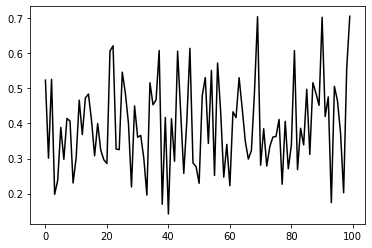

In [490]:
if __name__ == '__main__':
    no_solution = 100
    dims = (INPUT_NODES * HIDDEN_NODES) + HIDDEN_NODES + (HIDDEN_NODES * OUTPUT_NODES) + OUTPUT_NODES
    w_range = (0.0, 1.0)
    lr_range = (0.0, 1.0)
    alpha_range = (0.9, 0.9)  
    components = (0.5, 0.3)  
    #arr = np.array(output_from_outputlayer)
    s = Swarm(no_solution, dims, w_range, lr_range, alpha_range, components)
 
    s.optimize(forward_pass, input_X, output_Y, 1, 1)
    W = s.get_best_solution()
    Y_pred = predict(input_X, W)
    
    print("Predicted Values : ")
    print(np.matrix(Y_pred))
    
    
    accuracy = get_accuracy(output_Y, Y_pred)
    print("Accuracy: %.3f"% accuracy)

    
    print(len(s.mserror))
    print ("-----------------iterations------------------------")
    print(s.no_of_iterations)
    
    s.drawGraph()